# Simple graph formation game

import

In [26]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


# EVERYTHING MAKE WE GRAPH WITH 100 NODES

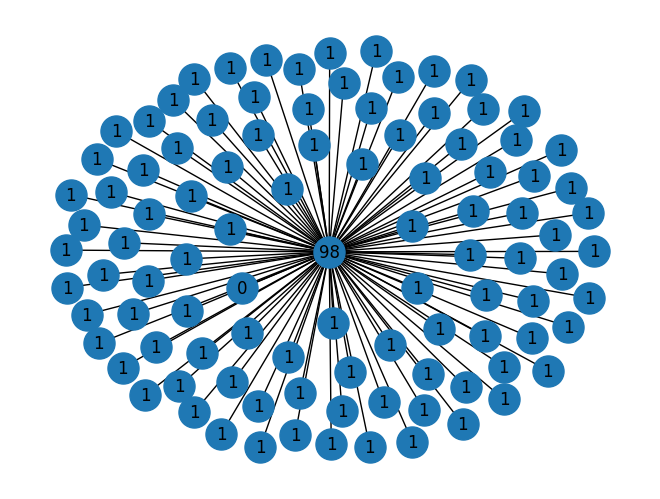

In [27]:
#number of nodes
N = 100

#empty graph
G = nx.Graph()
G.add_nodes_from(range(N))

#assign random time for each node
for node in G.nodes:
    G.nodes[node]['time']= random.random()
    G.nodes[node]['value']= 0
#sorted for the order
sorted_nodes = sorted(G.nodes, key=lambda x: G.nodes[x]['time'])


for node in sorted_nodes:
    # values of every nodes 
    for other in list(G.nodes()):
        value = 0
        if other != node:
            if G.degree(other) == 1:
                G.nodes[other]['value'] = 1
            elif G.degree(other) == 0:
                G.nodes[other]['value'] = 0
            else:
                for neighbord in list(G.neighbors(other)):
                    value += G.nodes[neighbord]['value']  # sum the values of the neighbors
                G.nodes[other]['value'] = value  # update the value of the node
                
                
    max_value = max([G.nodes[other]['value'] for other in list(G.nodes())])  # max value of the nodes
    # Case there are few nodes with the same value (max)
    best_nodes = [other for other in list(G.nodes()) if G.nodes[other]['value'] == max_value]
    chosen_node = random.choice(best_nodes)    
    
    G.add_edge(node, chosen_node)
labels = nx.get_node_attributes(G,'value')
nx.draw(G, with_labels=True, labels=labels, node_size= 500)
plt.show()
    
    
    

The node with the highest number is one of the first two nodes of the first link. All the other one have 1 in value 

This show that without any modification the best way to play this game is to connect everyone to one node.

Let's add a subtility by changing the perceived_value of node between 50% and 150% of it's real value

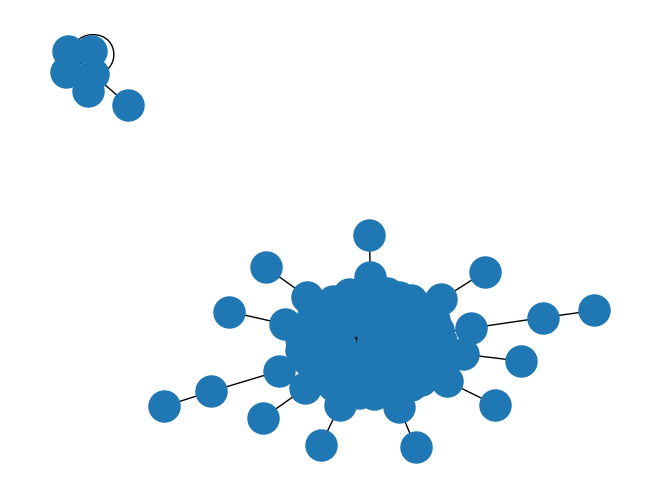

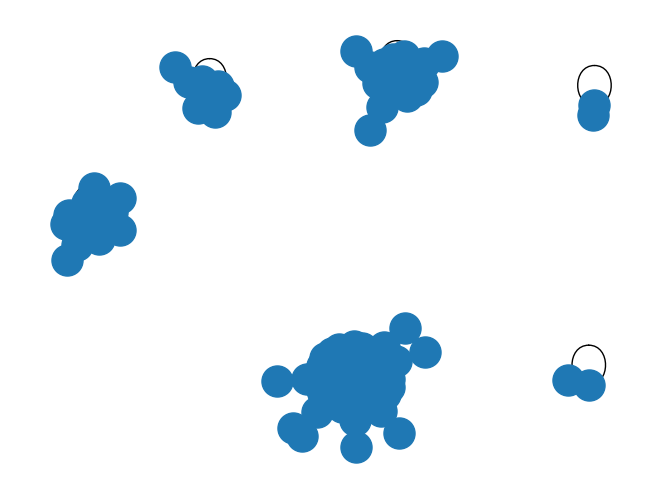

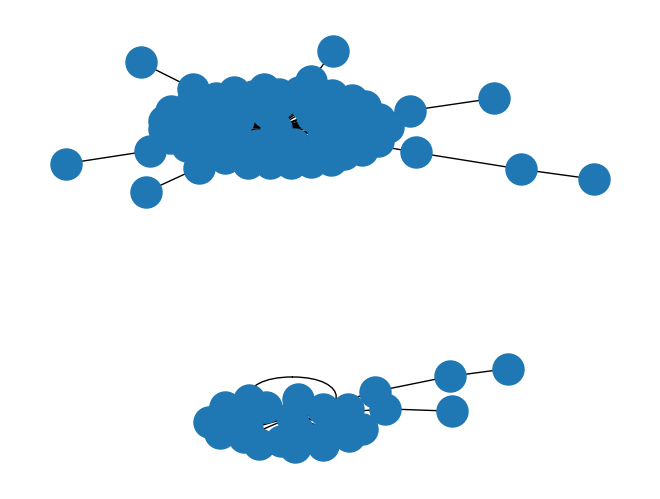

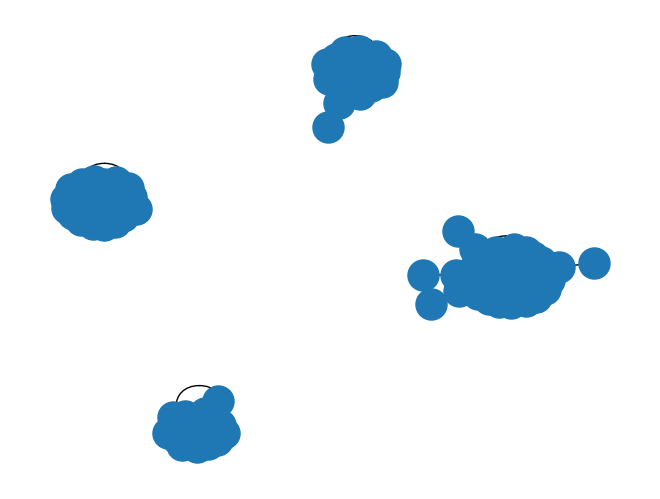

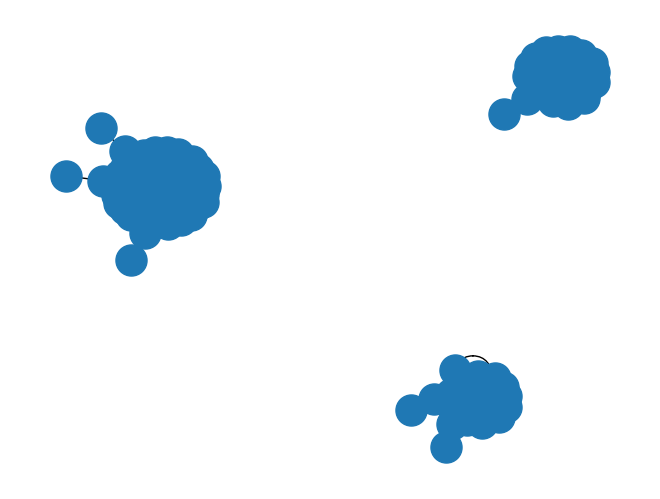

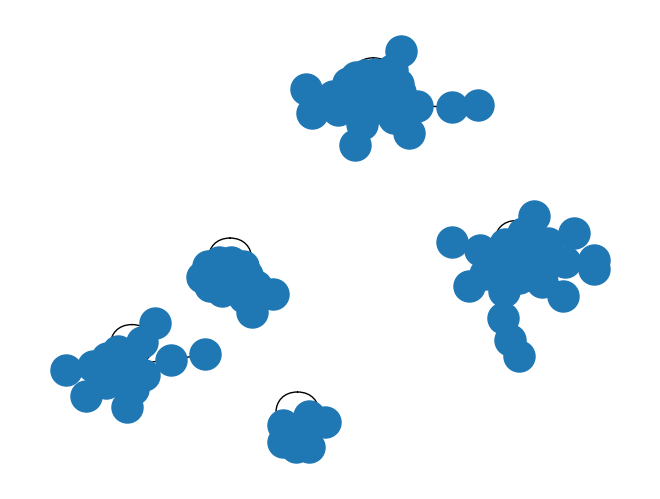

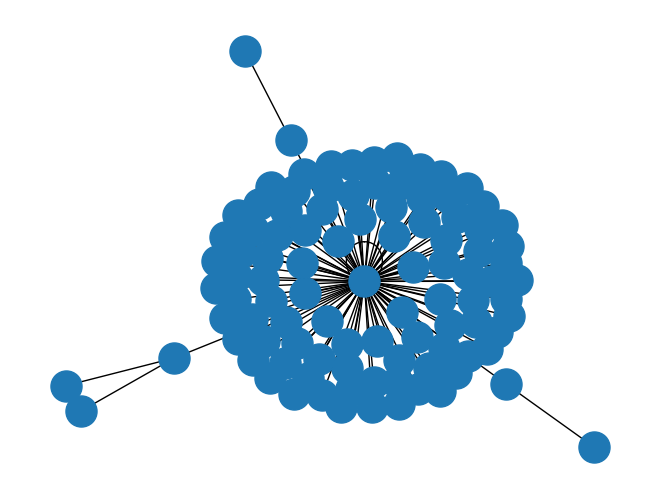

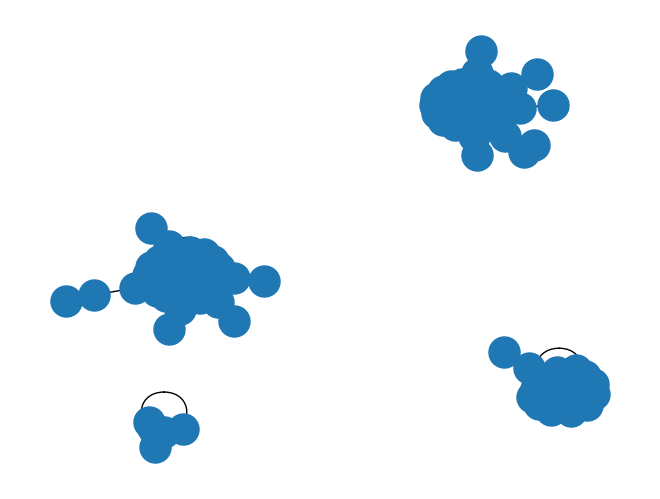

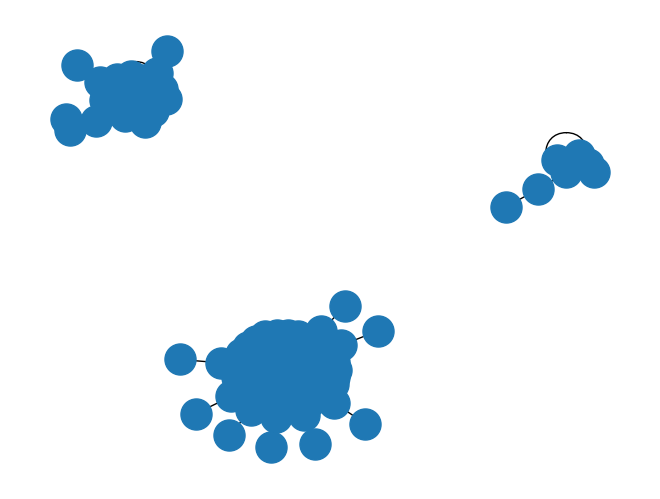

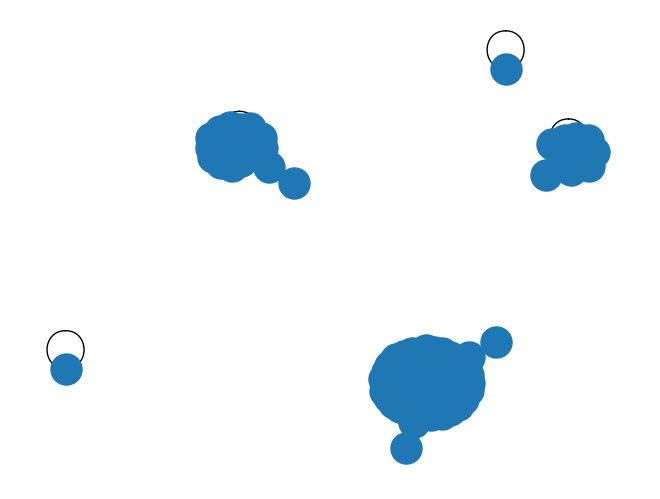

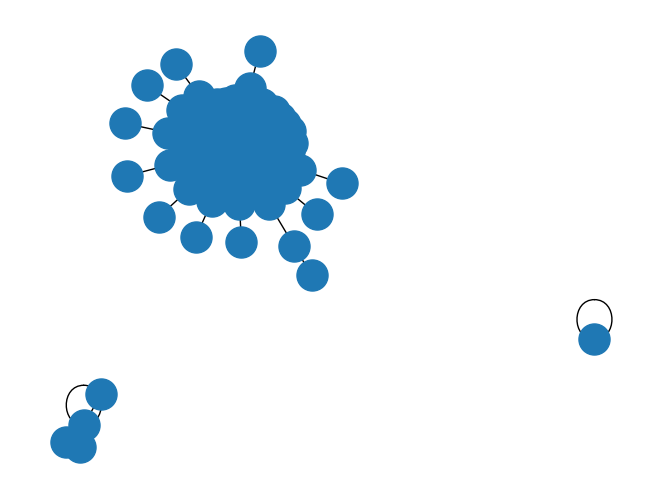

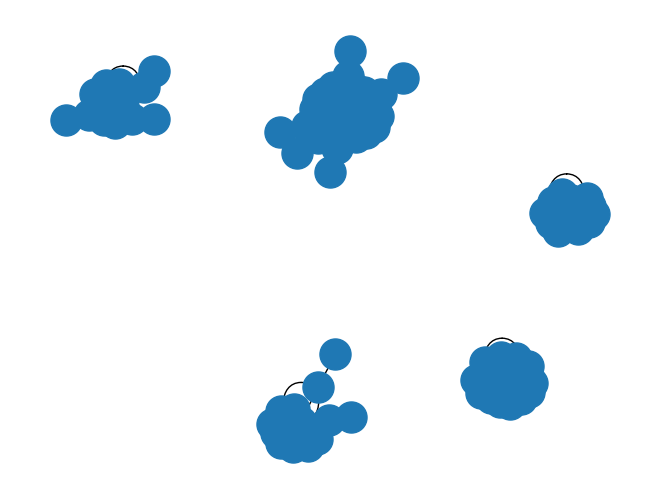

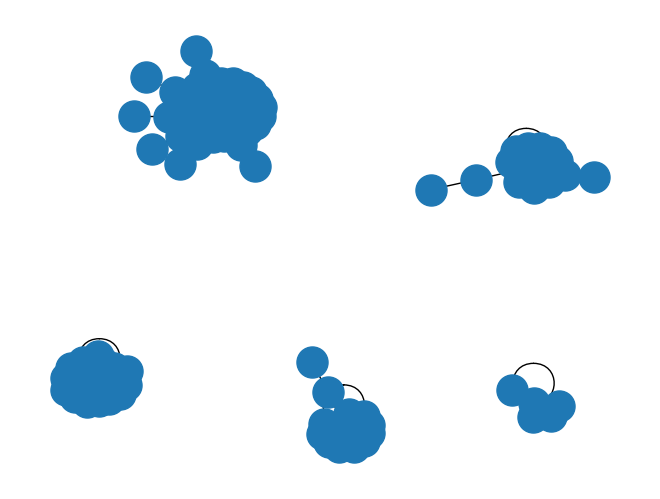

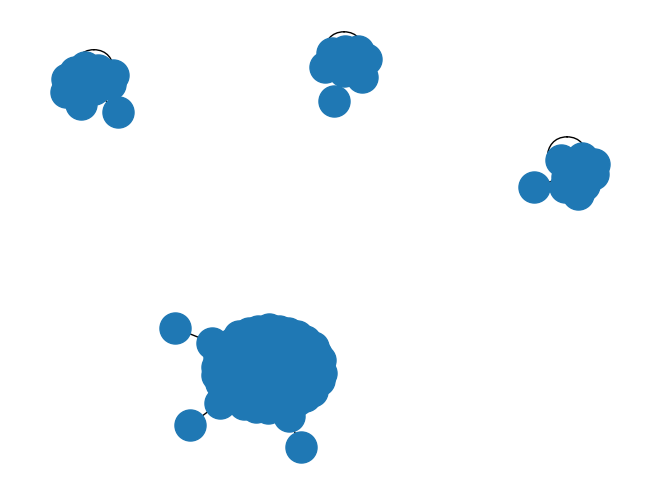

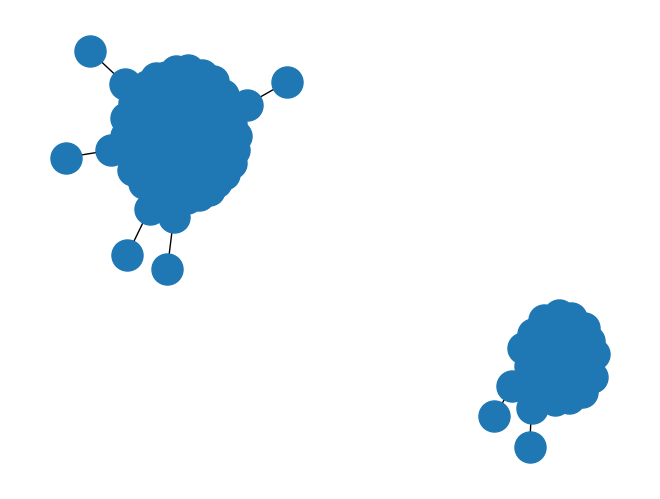

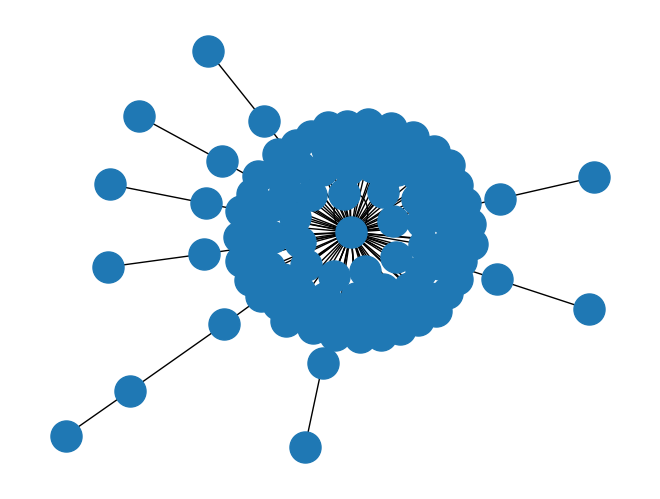

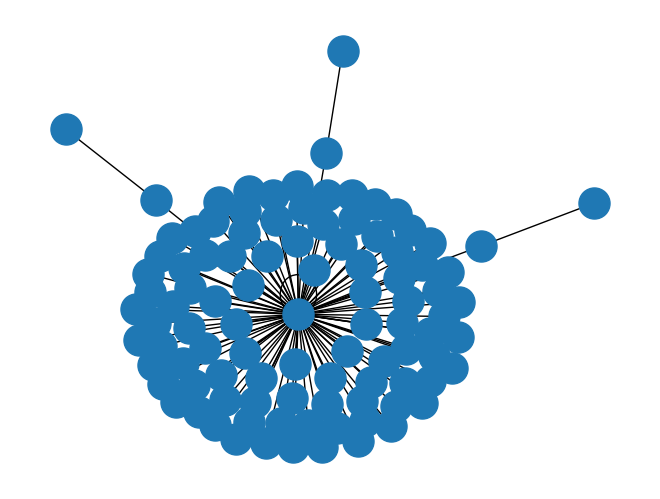

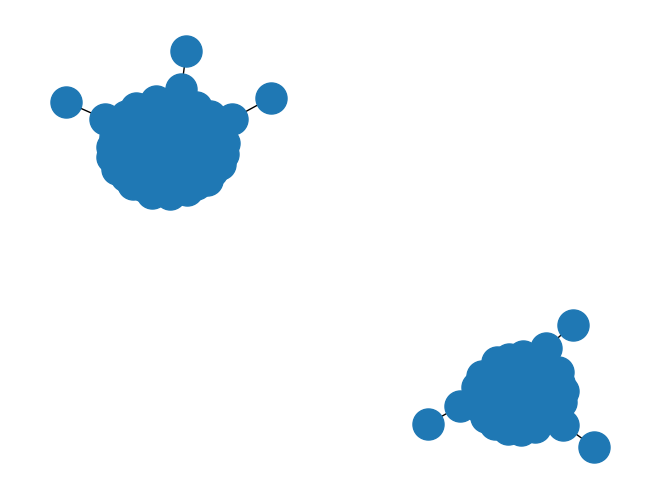

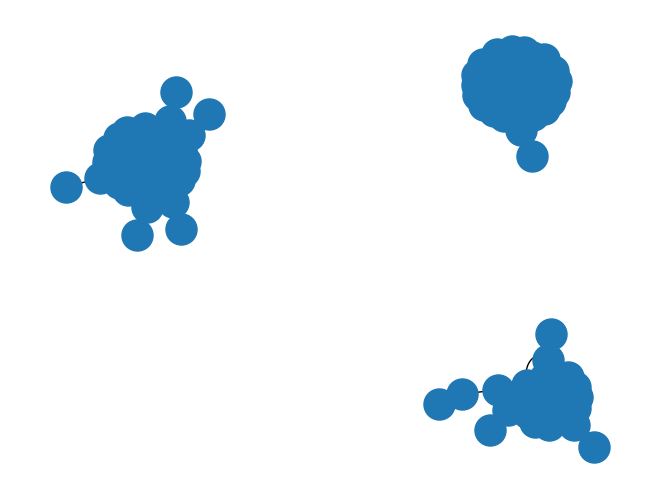

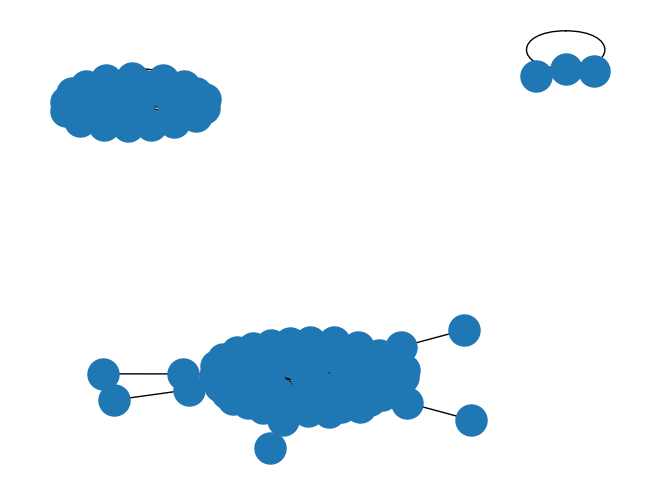

{1: 92, 66: 1, 2: 5, 4: 1, 28: 1}


In [32]:
nbGraph = 20
for i in range(0,nbGraph):
    #number of nodes
    N = 100

    #empty graph
    G = nx.Graph()
    G.add_nodes_from(range(N))

    #assign random time for each node
    for node in G.nodes:
        G.nodes[node]['time']= random.random()
        G.nodes[node]['value']= 0
        G.nodes[node]['perceived_value'] = G.nodes[node]['value']*random.uniform(0.5,1.5) #how value is perceived by neighbors
    #sorted for the order
    sorted_nodes = sorted(G.nodes, key=lambda x: G.nodes[x]['time'])



    all_degrees = []

    for node in sorted_nodes:
        # values of every nodes 
        for other in list(G.nodes()):
            value = 0
            if other != node:
                if G.degree(other) == 1:
                    G.nodes[other]['value'] = 1
                    G.nodes[node]['perceived_value'] = G.nodes[node]['value']*random.uniform(0.5,1.5)
                elif G.degree(other) == 0:
                    G.nodes[other]['value'] = 0
                    G.nodes[node]['perceived_value'] = G.nodes[node]['value']*random.uniform(0.5,1.5)
                else:
                    for neighbord in list(G.neighbors(other)):
                        value += G.nodes[neighbord]['value']  # sum the values of the neighbors
                    G.nodes[other]['value'] = value  # update the value of the node
                    G.nodes[node]['perceived_value'] = G.nodes[node]['value']*random.uniform(0.5,1.5)
                    
                    
        max_value = max([G.nodes[other]['perceived_value'] for other in list(G.nodes())])  # max value of the nodes
        # Case there are few nodes with the same value (max)
        best_nodes = [other for other in list(G.nodes()) if G.nodes[other]['perceived_value'] == max_value]
        chosen_node = random.choice(best_nodes)    
        
        G.add_edge(node, chosen_node)
        
    degrees = [G.degree(node) for node in list(G.nodes())]
    all_degrees.extend(degrees)

        
    
    

    
    
        
    # Show the graph
    
    
    
    # labels = nx.get_node_attributes(G,'value')
    # labels = {node: '{:.2f}'.format(value) for node, value in labels.items()}
    # nx.draw(G, with_labels=True, labels=labels, node_size= 500)
    nx.draw(G, node_size= 500)
    plt.show()
        
    
    
# determine average degrees distribution
degree_distribution = dict(Counter(all_degrees))
print(degree_distribution)
average_degree_distribution = {k: v / len(all_degrees) for k, v in degree_distribution.items()}
average_degree_distribution_list = list(average_degree_distribution.items())

df = pd.DataFrame(average_degree_distribution_list,columns=["Degree","Average Frequency"])
sorted_df = df.sort_values(by=['Degree'])
sorted_df.to_csv(f'sources/average_degree_distribution_part2_with_{nbGraph}.csv', index=False)


    

### plots of degree distribution

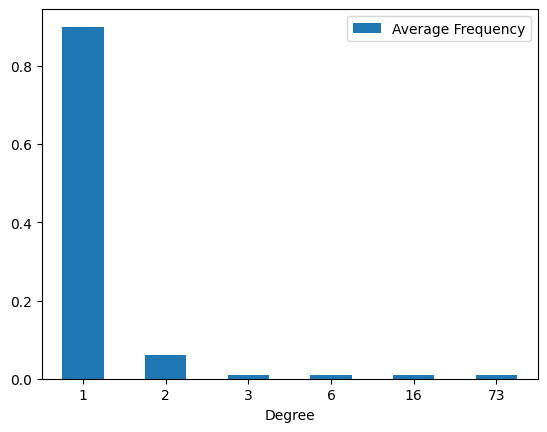

In [31]:
nbGraphRead = 1000
read_df = pd.read_csv(f'sources/average_degree_distribution_part2_with_{nbGraphRead}.csv')
read_df.plot.bar(x="Degree",y="Average Frequency",rot=0)
plt.show()

## Bilan

Communities started to create. Node degreee distribution follow a exponential law.  